In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
yolo = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg") #using yolov4 config files & Weights
classes = []
             
csv_column='filename' #initializing columns name for csv
with open("coco.names","r") as file:
    classes = [line.strip() for line in file.readlines()]
    for i in classes:
        csv_column=csv_column+','+i   

#writing column names to csv
bill=open('data.csv','a+')
bill.write(csv_column)
bill.close()

In [4]:
layer_names = yolo.getLayerNames()
output_layers = [layer_names[i - 1] for i in yolo.getUnconnectedOutLayers()]
colorRed   = (0, 0, 255)
colorGreen = (0, 255, 0)

# Run Object Detection on Whole DataSet Images

In [6]:
import sys
import os
path="dataset/"    #  <--- change path here
filenames = next(os.walk(path))[2] #give the path of the image
for f in filenames:
    img = cv2.imread(path+f)
    height, width, channels = img.shape
    
    key={}
    with open("coco.names","r") as file:
        classes = [line.strip() for line in file.readlines()]
        for i in classes:
            key[i]=0       #initialize each count with zero

    blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    yolo.setInput(blob)
    outputs = yolo.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if (confidence > 0.5):
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w/2)
                y = int(center_y - h/2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    colors = np.random.uniform(0, 255, size=(len(classes), 3))

    import sys,json
    for i in range(len(boxes)):
        if i in indices:
            x, y, w, h = boxes[i]
            try:
                #print("The entry is")
                label =str(classes[class_ids[i]])

            except:
                print("Oops!", sys.exc_info()[0], "occurred.")
                break

            start = (x,y)
            end = (x+w,y+h)
            cv2.rectangle(img, start, end, (0,255,0), 4)
            cv2.putText(img, label, (x,y-20), cv2.FONT_HERSHEY_PLAIN, 5, colorRed, 4)
            #print(label)
            for i in classes:
                if label==i:
                    #print(label,i)
                    key[label]=key[label]+1

    print('\n filename : '+f)    
    csv_row=f   #filename
    for i in classes:
        csv_row=csv_row+','+str(key[i])        #writing value of object counts in the rows

        if key[i]>0:         #shows the object counts
            print(i+' : '+str(key[i]))
    bill=open('data.csv','a+')
    bill.write("\n"+csv_row)
    bill.close()


           
 



 filename : 1478899779101212533.jpg
car : 12

 filename : 1478898574822291723.jpg
car : 2
bus : 1
truck : 1

 filename : 1478020306191651906.jpg
car : 3

 filename : 1478901058790772563.jpg

 filename : 1478897789299549164.jpg
car : 2
truck : 1

 filename : 1478900720586238976.jpg
fire hydrant : 1
stop sign : 1

 filename : 1478732246973274636.jpg
bicycle : 1
car : 5
truck : 1
traffic light : 5

 filename : 1478895432729065908.jpg

 filename : 1478732996516905635.jpg
car : 1

 filename : 1478895450439457200.jpg

 filename : 1478899471176667712.jpg
person : 6
car : 4
traffic light : 1

 filename : 1478732320954181631.jpg
car : 3
traffic light : 4

 filename : 1478021918584886453.jpg
car : 11

 filename : 1478021007721033551.jpg
car : 3
traffic light : 2

 filename : 1478896574165424315.jpg
car : 5

 filename : 1478895841201313716.jpg

 filename : 1478895781216087813.jpg

 filename : 1478732511350215112.jpg
car : 5

 filename : 1478898901028431352.jpg
car : 2
traffic light : 3

 filenam


 filename : 1478899059275936062.jpg
car : 1

 filename : 1478895495571107704.jpg

 filename : 1478897480231516960.jpg
car : 10
traffic light : 4

 filename : 1478731941880488582.jpg
car : 3

 filename : 1478895925181268250.jpg

 filename : 1478898785628059431.jpg

 filename : 1478898463421276667.jpg
car : 1

 filename : 1478901456408814108.jpg
car : 5

 filename : 1478895384741215223.jpg

 filename : 1478901528390429946.jpg
car : 8

 filename : 1478898583962755126.jpg
car : 7
truck : 1

 filename : 1478895457866117612.jpg

 filename : 1478898795913108673.jpg

 filename : 1478899535731979602.jpg
traffic light : 2

 filename : 1478020819213127742.jpg
car : 1

 filename : 1478020865220098290.jpg
car : 4
truck : 1

 filename : 1478898242903352265.jpg
car : 4
bus : 1

 filename : 1478895311615281701.jpg

 filename : 1478897624195701154.jpg
car : 8

 filename : 1478020480697757042.jpg
person : 1
car : 6
traffic light : 11

 filename : 1478900724585926608.jpg

 filename : 1478899557440523244

# Show The Filenames Containing Person

In [ ]:
#read above stored data

df = pd.read_csv('data.csv')

In [10]:
person_result=df.loc[df['person'] != 0]
print(person_result[['filename', 'person']])

                    filename  person
10   1478899471176667712.jpg       6
23   1478900762290790834.jpg       1
29   1478898503410810130.jpg       3
36   1478900585762094502.jpg       1
57   1478899733971153044.jpg       3
59   1478898552542073131.jpg       4
65   1478020222697139180.jpg       1
71   1478898585676705442.jpg       2
97   1478899636278595515.jpg       1
102  1478898613671032770.jpg       1
104  1478899633993703282.jpg       1
111  1478732030196490164.jpg       1
115  1478899635707169088.jpg       2
146  1478899761391945935.jpg       2
152  1478899443182556878.jpg       3
156  1478899414618635920.jpg       7
158  1478899579721011365.jpg       1
159  1478019984182279255.jpg       1
182  1478020480697757042.jpg       1
193  1478899632279305991.jpg       2
197  1478899634564672538.jpg       4


# Testing Code

In [59]:
img = cv2.imread("Test/12.jpg")     #<--------- Write your filename here to test
height, width, channels = img.shape

key={}
with open("coco.names","r") as file:
    classes = [line.strip() for line in file.readlines()]
    for i in classes:
        key[i]=0

blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True, crop=False)
yolo.setInput(blob)
outputs = yolo.forward(output_layers)

class_ids = []
confidences = []
boxes = []
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if (confidence > 0.5):
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w/2)
            y = int(center_y - h/2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
colors = np.random.uniform(0, 255, size=(len(classes), 3))

import sys,json
for i in range(len(boxes)):
    if i in indices:
        x, y, w, h = boxes[i]
        try:
            #print("The entry is")
            label =str(classes[class_ids[i]])

        except:
            print("Oops!No objects Were in the Image")
            break

        start = (x,y)
        end = (x+w,y+h)
        cv2.rectangle(img, start, end, (0,255,0), 4)
        cv2.putText(img, label, (x,y-20), cv2.FONT_HERSHEY_PLAIN, 5, colorRed, 4)
        #print(label)
        for i in classes:
            if label==i:
                #print(label,i)
                key[label]=key[label]+1

    
for i in classes:
    if key[i]>0:         #shows the object counts
        print(i+' : '+str(key[i]))

person : 1


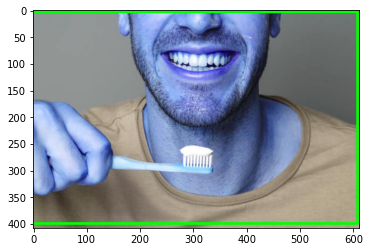

In [60]:
plt.imshow(img)